# Algoritmos de Clasificacion 

In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [2]:
#Abrimos el archivo con los datos de Training Limpios
df = pd.read_csv('data_cleanAlgoritmo.csv')
df = df.set_index('id')
df.head()

,name,release_date,artists,total_tracks,t_name0,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,,,,,,
0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,7.0,1.0,192284.000,0.537,0.459,0.049,0.490,0.000,0.091,0.779,133.243,3.333,51.0,3
1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,10.0,0.0,195199.667,0.779,0.658,0.202,0.109,0.000,0.114,0.413,139.028,4.000,67.0,4
2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,8.0,0.0,154768.333,0.555,0.487,0.273,0.241,0.029,0.287,0.521,122.269,4.000,81.0,5
3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,8.0,1.0,203866.333,0.628,0.585,0.027,0.333,0.000,0.203,0.556,114.783,4.000,53.0,3
4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,9.0,1.0,140693.000,0.638,0.302,0.072,0.711,0.000,0.271,0.533,116.460,4.000,70.0,4


In [3]:
df.shape

(72357, 19)

In [4]:
#Verificamos que no hay valores nulos 
df.isnull().sum()

name                0
release_date        0
artists             0
total_tracks        0
t_name0             0
t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
t_sig0              0
popularity          0
ClasePopularidad    0
dtype: int64

**Entrenamiento como Problema de Clasificacion**

En este caso nuestro target es la variable creada **ClasePopularidad** que tiene los 5 niveles de popularidad definidos (ver Notebook de Limpieza de Datos).

Veamos la proporcion de cada clase, para ver que tan desbalanceada esta la variable target


In [5]:
df['ClasePopularidad'].value_counts(normalize = True)

2    0.358860
1    0.325898
3    0.250591
4    0.063214
5    0.001437
Name: ClasePopularidad, dtype: float64

Vemos que las clases 1,2 y 3 resultan en el 92% de todos los datos, mientras que las clases 4 y 5 estan reducidas al 8%. Por lo que los datos estan muy desbalanceados. 

## 1- Arbol de Decision

In [6]:
'''Dividimos el data set en Atributos y Target'''

X = df.drop(['name','release_date','artists','total_tracks','t_name0','popularity','ClasePopularidad'],axis = 1)
y = df['ClasePopularidad']


In [7]:
'''Hacemos el split en Train set y Test Set
Usaremos un split de 80%-20%'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

In [8]:
'''Creamos el modelo'''


modelArbol= tree.DecisionTreeClassifier(random_state = 13) 
modelArbol.fit(X_train, y_train) 


DecisionTreeClassifier(random_state=13)

In [9]:
#prediccion

yPred = modelArbol.predict(X_test)
yPred

array([1, 1, 4, ..., 2, 1, 2], dtype=int64)

### Evaluacion del Modelo - Metricas

In [10]:
#Evaluacion para Clasificacion

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

#Report
f1 = f1_score(y_test,yPred,average='weighted')
print(f'El F1 Score del modelo es de {f1}')
print(classification_report(y_test,yPred))


confusion_matrixArbol = pd.DataFrame(confusion_matrix(y_test, yPred))
confusion_matrixArbol.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixArbol.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixArbol)

El F1 Score del modelo es de 0.3475357686990242
              precision    recall  f1-score   support

           1       0.38      0.38      0.38      4732
           2       0.38      0.38      0.38      5140
           3       0.31      0.32      0.32      3665
           4       0.14      0.15      0.14       913
           5       0.08      0.09      0.09        22

    accuracy                           0.35     14472
   macro avg       0.26      0.26      0.26     14472
weighted avg       0.35      0.35      0.35     14472

           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  1777                  1684             1017   
MediaBaja             1642                  1940             1248   
Media                 1013                  1185             1164   
MediaAlta              225                   267              283   
Alta                     4                     9                4   

           Prediccion MediaAlta  Prediccion Alta

In [11]:
yTest = y_test.reset_index()
ResultsClas = yTest.drop('id', axis = 1)
ResultsClas['prediccion'] = yPred
ResultsClas.loc[ResultsClas['ClasePopularidad']>4]
    

,ClasePopularidad,prediccion
1521,5,3
1672,5,2
1799,5,2
2417,5,4
2962,5,4
3078,5,3
3559,5,2
3574,5,1
3677,5,2
4279,5,5


**Observaciones**



In [12]:
'''Generamos una funcion que nos de el Valor de F1 para diferentes valores de Poda, de 1 a 15'''

poda = np.arange(1,15)
accuracy = []
result = []

for i in poda:
    modelArbol= tree.DecisionTreeClassifier(random_state = 13,max_depth = i)  #Generamos el clasificador con la poda seleccionada
    modelArbol.fit(X_train, y_train) 
    yPred = modelArbol.predict(X_test) #Generamos la prediccion
    
    a= accuracy_score(y_test,yPred)
    f = f1_score(y_test,yPred,average='weighted')  
    accuracy.append(a)
    result.append(f)
result


[0.28788048705362473,
 0.28788048705362473,
 0.3078764815049817,
 0.3175436118741943,
 0.37307249758457034,
 0.3703940880244257,
 0.3683421383903139,
 0.37139284403732326,
 0.36567122758382353,
 0.3796427452859862,
 0.3752670476208142,
 0.3749203410912541,
 0.3755278290197333,
 0.3741689753599802]

In [13]:
accuracy

[0.37610558319513543,
 0.37610558319513543,
 0.37804035378662243,
 0.3850884466556108,
 0.39165284687672747,
 0.3960751796572692,
 0.3971116639027087,
 0.39807904919845216,
 0.396489773355445,
 0.3943477059148701,
 0.3914455500276396,
 0.3920674405749033,
 0.39130735212824763,
 0.38598673300165837]

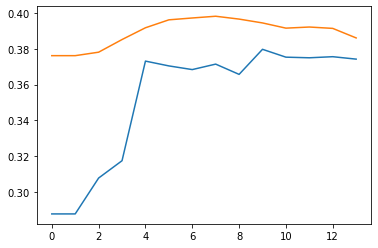

In [14]:
'''Hacemos un grafico sencillo para ver evaluar el resultado'''
plt.plot(result)
plt.plot(accuracy)

**Observaciones**




# 2- Random Forest

In [15]:
'''Utilizando la misma division que se uso para la Regresion por Arbol de decision'''

X_test
y_train

id
146790    2
142735    1
971       4
61341     1
153359    3
         ..
70247     2
44415     4
142189    3
62804     2
95312     1
Name: ClasePopularidad, Length: 57885, dtype: int64

In [16]:
'''Creamos el modelo'''

modelo_random_forest = RandomForestClassifier(n_estimators = 25) 
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [17]:
#Se hace la prediccion
yPredForest = modelo_random_forest.predict(X_test)

In [18]:
#Evaluacion con Metricas

f1Forest = f1_score(y_test,yPredForest,average='weighted')
print(f'El F1 Score del modelo es de {f1Forest}')
print(classification_report(y_test,yPredForest))


confusion_matrixForest = pd.DataFrame(confusion_matrix(y_test, yPredForest))
confusion_matrixForest.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixForest.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixForest)

El F1 Score del modelo es de 0.38883241537472946
              precision    recall  f1-score   support

           1       0.42      0.48      0.45      4732
           2       0.39      0.47      0.43      5140
           3       0.39      0.29      0.33      3665
           4       0.41      0.06      0.10       913
           5       0.67      0.09      0.16        22

    accuracy                           0.40     14472
   macro avg       0.46      0.28      0.29     14472
weighted avg       0.40      0.40      0.39     14472

           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  2285                  1905              532   
MediaBaja             1844                  2425              852   
Media                 1033                  1540             1051   
MediaAlta              247                   365              249   
Alta                    10                     5                3   

           Prediccion MediaAlta  Prediccion Alt

In [19]:
'''Similar al caso del Arbol, haremos un loop para calcular Accuracies a diferentes valore de n_estimator'''

import time   #Quiero ver tambien cuanto tiempo lleva el training segun el numero de estimadores
T = []
estimators = np.arange(10,100,10)
accuracyForest = []
resultForest = []

for i in estimators:
    inicio = time.process_time()
    modelo_random_forest = RandomForestClassifier(n_estimators = i) 
    modelo_random_forest.fit(X_train, y_train)
    yPredForest = modelo_random_forest.predict(X_test)
    fin = time.process_time()
    t = fin-inicio
    T.append(t)
    print(t)
    
    
    a= accuracy_score(y_test,yPredForest)
    f = f1_score(y_test,yPredForest,average='weighted')  
    accuracyForest.append(a)
    resultForest.append(f)

resultForest



1.390625
2.859375
4.21875
5.640625
7.046875
8.5
10.078125
11.515625
12.671875


[0.3701362232796992,
 0.3823677585062852,
 0.38773191373320665,
 0.39085056155896,
 0.397654420752266,
 0.39928162846944304,
 0.40274276530681363,
 0.39876199906861326,
 0.3994410541122013]

In [41]:
accuracyForest

[0.3826008844665561,
 0.39614427860696516,
 0.4033305693753455,
 0.4059563294637922,
 0.4161829740187949,
 0.41252072968490877,
 0.4134190160309563,
 0.4166666666666667,
 0.41404090657822]

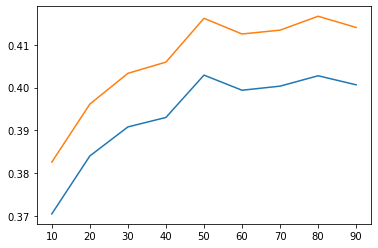

In [40]:
'''Hacemos un grafico sencillo para ver evaluar el resultado'''
plt.plot(estimators, resultForest)
plt.plot(estimators, accuracyForest)


**Observaciones**



# 3- SVM

Para SVM debemos elegir que tipo de funcionalidad tendra el plano de separacion. Comenzaremos con la opcion mas facil que es una funcionalidad lineal y veremos el resultado obtenido segun las metricas

In [ ]:
'''Creamos el modelo'''

modelo_SVM = SVC(kernel = 'linear') 
modelo_SVM.fit(X_train, y_train)

In [ ]:
#Se hace la prediccion
yPredSVM = modelo_SVM.predict(X_test)

In [ ]:
#Evaluacion con Metricas

f1SVM = f1_score(y_test,yPredSVM,average='weighted')
print(f'El F1 Score del modelo es de {f1Forest}')
print(classification_report(y_test,yPredSVM))


confusion_matrixForest = pd.DataFrame(confusion_matrix(y_test, yPredSVM))
confusion_matrixForest.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixForest.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixForest)